### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install emcee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 589.2 kB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import emcee
from scipy.optimize import minimize
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns
import gc
import time
from sklearn.metrics import roc_auc_score
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

<ipython-input-4-d867fd071f7d>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


In [ ]:
start_time = time.time()
train_cite = pd.read_hdf('/content/drive/MyDrive/Multimodal_Single_Cell analysis/Selected_Cite_train (1).h5')
end_time = time.time()
print(end_time - start_time)
train_cite.head(100)

2.254295825958252


,cell_id,ENSG00000114013_CD86,ENSG00000120217_CD274,ENSG00000157873_TNFRSF14,ENSG00000073008_PVR,ENSG00000130202_NECTIN2,ENSG00000196776_CD47,ENSG00000117091_CD48,ENSG00000101017_CD40,ENSG00000102245_CD40LG,...,ENSG00000104921_FCER2,ENSG00000168995_SIGLEC7,ENSG00000204592_HLA-E,ENSG00000085117_CD82,ENSG00000134256_CD101,ENSG00000197405_C5AR1,ENSG00000100031_GGT1,cell_type,donor,day
0,45006fe3e4c8,0.0,0.0,0.000000,0.000000,0.000000,5.177577,4.090185,0.000000,0.0,...,0.0,0.0,0.000000,5.177577,0.0,0.0,0.0,HSC,32606,2
1,d02759a80ba2,0.0,0.0,0.000000,0.000000,0.000000,4.723850,0.000000,0.000000,0.0,...,0.0,0.0,4.039545,0.000000,0.0,0.0,0.0,HSC,32606,2
2,c016c6b0efa5,0.0,0.0,0.000000,0.000000,0.000000,5.439542,0.000000,0.000000,0.0,...,0.0,0.0,3.847321,5.217484,0.0,0.0,0.0,EryP,32606,2
3,ba7f733a4f75,0.0,0.0,0.000000,0.000000,3.436846,4.113780,5.487739,0.000000,0.0,...,0.0,0.0,4.513782,3.436846,0.0,0.0,0.0,NeuP,32606,2
4,fbcf2443ffb2,0.0,0.0,0.000000,0.000000,0.000000,4.196826,0.000000,3.518610,0.0,...,0.0,0.0,3.518610,4.882423,0.0,0.0,0.0,EryP,32606,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,613f1d17569a,0.0,0.0,0.000000,4.437457,0.000000,4.838973,3.756067,3.756067,0.0,...,0.0,0.0,4.437457,0.000000,0.0,0.0,0.0,HSC,32606,2
96,997cb42b095c,0.0,0.0,0.000000,0.000000,0.000000,4.154892,0.000000,0.000000,0.0,...,0.0,0.0,3.477311,3.477311,0.0,0.0,0.0,HSC,32606,2
97,21e74451fc57,0.0,0.0,3.949137,0.000000,0.000000,4.632602,0.000000,0.000000,0.0,...,0.0,0.0,5.034819,4.632602,0.0,0.0,0.0,MkP,32606,2
98,a7de418fbaa3,0.0,0.0,0.000000,0.000000,0.000000,3.536246,3.536246,0.000000,0.0,...,0.0,0.0,4.214725,0.000000,0.0,0.0,0.0,NeuP,32606,2


In [ ]:
start_time = time.time()
target_cite = pd.read_hdf('/content/drive/MyDrive/Multimodal_Single_Cell analysis/Selected_Cite_target.h5')
end_time = time.time()
print(end_time - start_time)
target_cite.head(100)

1.3817453384399414


,cell_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,...,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224,cell_type,donor,day
0,45006fe3e4c8,1.167804,0.622530,0.106959,0.324989,3.331674,6.426002,1.480766,-0.728392,-0.468851,...,0.674956,-0.006187,0.682148,1.398105,0.414292,1.780314,0.548070,HSC,32606,2
1,d02759a80ba2,0.818970,0.506009,1.078682,6.848758,3.524885,5.279456,4.930438,2.069372,0.333652,...,0.047607,-0.243628,0.547864,1.832587,0.982308,2.736507,2.184063,HSC,32606,2
2,c016c6b0efa5,-0.356703,-0.422261,-0.824493,1.137495,0.518924,7.221962,-0.375034,1.738071,0.142919,...,-0.131097,-0.177604,-0.689188,9.013709,-1.182975,3.958148,2.868600,EryP,32606,2
3,ba7f733a4f75,-1.201507,0.149115,2.022468,6.021595,7.258670,2.792436,21.708519,-0.137913,1.649969,...,0.587863,-0.752638,1.714851,3.893782,1.799661,1.537249,4.407671,NeuP,32606,2
4,fbcf2443ffb2,-0.100404,0.697461,0.625836,-0.298404,1.369898,3.254521,-1.659380,0.643531,0.902710,...,-0.841950,-0.869419,0.675092,5.259685,-0.835379,9.631781,1.765445,EryP,32606,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,613f1d17569a,0.794206,-0.199354,0.394503,3.241314,5.260645,9.948053,6.012152,-1.130722,-1.179481,...,-0.392741,-0.260484,0.211767,2.328443,0.300692,1.552404,2.435165,HSC,32606,2
96,997cb42b095c,0.708206,1.224581,0.283149,4.834080,6.004161,5.116378,6.944627,-0.579810,-0.299035,...,-0.728613,-0.319021,0.103488,3.733570,1.415138,3.011945,2.590399,HSC,32606,2
97,21e74451fc57,0.703518,-0.691138,-0.221186,4.191247,2.530828,6.909174,-0.643497,-0.584858,-1.076847,...,-0.618953,-0.322212,0.688929,2.686354,-0.565037,2.354875,1.413066,MkP,32606,2
98,a7de418fbaa3,-0.377428,-0.071481,0.283527,6.219676,6.290244,9.210437,6.139829,-0.378388,0.278112,...,0.670538,-0.191711,0.338978,3.172512,1.079168,1.736706,0.593801,NeuP,32606,2


<Axes: >

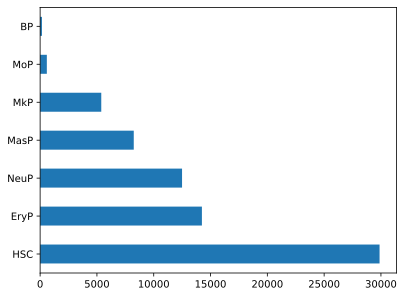

In [ ]:
train_cite["cell_type"].value_counts().plot(kind="barh")

## Preparing the Dataset

In [ ]:
avg_mRNA=[]
avg_protein=[]
var_mRNA=[]
var_protein=[]
for mRNA,protein in zip(train_cite.columns[1:-3],target_cite.columns[1:-3]):
    if protein!='CD1c' and protein!='LOX-1':
        x=train_cite[mRNA]
        y=target_cite[protein]
        x,y=x[x>0],y[x>0]
        avg_mRNA.append(np.mean(x))
        avg_protein.append(np.mean(y))
        var_mRNA.append(np.var(x))
        var_protein.append(np.var(y))

In [ ]:
print(np.array(var_mRNA).shape)
print(np.array(var_protein).shape)

(106,)
(106,)


In [ ]:
cell_types = ['BP', 'EryP', 'HSC', 'MasP', 'MkP', 'MoP', 'NeuP']

In [ ]:
avg_mRNA_cell_type=[[],[],[],[],[],[],[]]
avg_protein_cell_type=[[],[],[],[],[],[],[]]
var_mRNA_cell_type=[[],[],[],[],[],[],[]]
var_protein_cell_type=[[],[],[],[],[],[],[]]
for mRNA,protein in zip(train_cite.columns[1:-3],target_cite.columns[1:-3]):
    if protein!='CD1c' and protein!='LOX-1':
        idx=0
        for celltype in cell_types:
            x=train_cite.query("`cell_type`== @ celltype")[mRNA]
            y=target_cite.query("`cell_type`== @ celltype")[protein]
            x,y=x[x>0],y[x>0]

            if len(x)>10:
                avg_mRNA_cell_type[idx].append(np.mean(x))
                avg_protein_cell_type[idx].append(np.mean(y))
                var_mRNA_cell_type[idx].append(np.var(x))
                var_protein_cell_type[idx].append(np.var(y))
            idx+=1

## Gaussian Process - Across All Cell Types

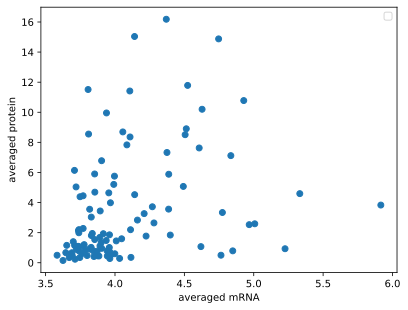

In [ ]:
plt.scatter(avg_mRNA, avg_protein)
plt.xlabel('averaged mRNA')
plt.ylabel('averaged protein')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel

def gaussian_process(X, y, ct=""):
  kernel = ConstantKernel() * RBF() + WhiteKernel()
  gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.9, normalize_y=True)
  gp.fit(X, y)

  x_pred = np.linspace(3, 7, 100)[:, np.newaxis]
  y_pred, sigma = gp.predict(x_pred, return_std=True)

  plt.figure(figsize=(10, 6))
  plt.plot(x_pred, y_pred, label='Prediction')
  plt.fill_between(x_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, color='#D9F5FF', alpha=1)
  plt.axhline(y=y.mean(), color="red", label="Protein's mean")
  plt.scatter(X, y, label='Observations')
  plt.xlabel("mRNA")
  plt.ylabel("protein")
  plt.title('Gaussian Process Regression with Linear+RBF Kernel {0}'.format(ct))
  plt.legend()
  plt.show()


In [ ]:
x = np.array(avg_mRNA)
X = x.reshape((106,1))
y = np.array(avg_protein)

In [ ]:
X.shape, y.shape

((106, 1), (106,))

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


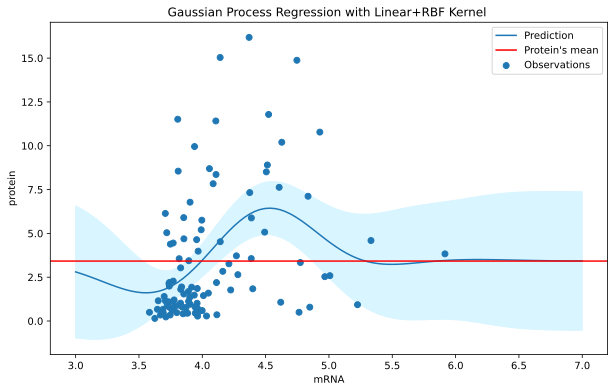

In [ ]:
gaussian_process(X,y)

## Gaussian Process - Across Each Cell Type

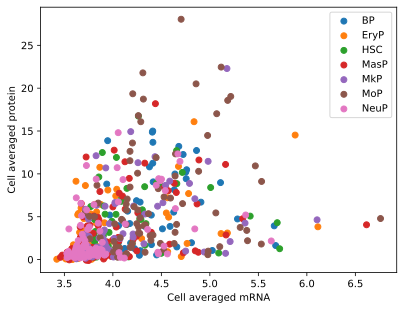

In [ ]:
idx=0
for celltype in cell_types:
    plt.scatter(avg_mRNA_cell_type[idx],(avg_protein_cell_type[idx]),label=celltype)
    idx+=1
plt.xlabel('Cell averaged mRNA')
plt.ylabel('Cell averaged protein')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel

def gaussian_process_cell_type(X, y, ct=""):
  kernel = ConstantKernel() * RBF() + WhiteKernel()
  gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.9, normalize_y=False)
  gp.fit(X, y)

  x_pred = np.linspace(3, 7, 100)[:, np.newaxis]
  y_pred, sigma = gp.predict(x_pred, return_std=True)

  plt.figure(figsize=(10, 6))
  plt.plot(x_pred, y_pred, label='Prediction')
  plt.fill_between(x_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, color='#D9F5FF', alpha=1)
  plt.axhline(y=y.mean(), color="red", label="Protein's mean")
  plt.scatter(X, y, label='Observations')
  plt.xlabel("mRNA")
  plt.ylabel("protein")
  plt.title('Gaussian Process Regression with Linear+RBF Kernel {0}'.format(": "+ct))
  plt.legend()
  plt.show()

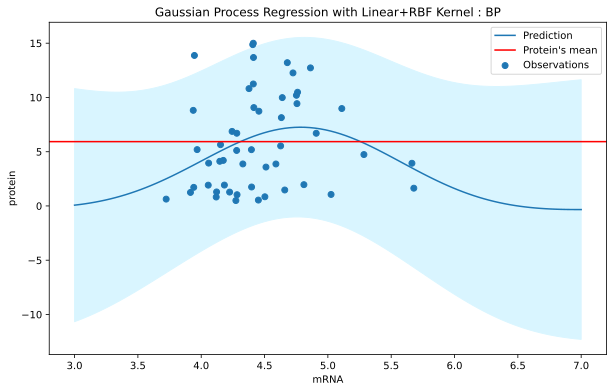

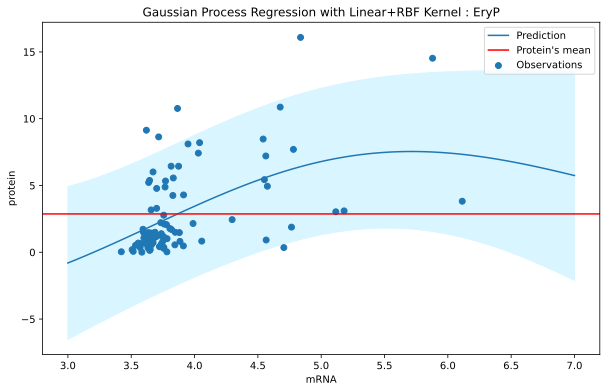

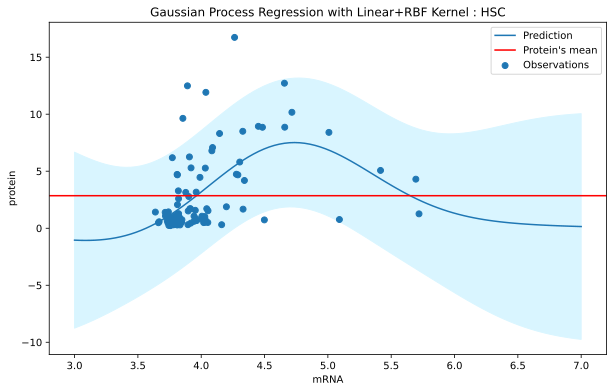

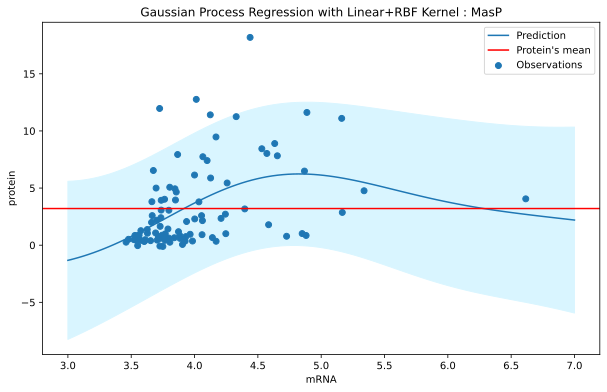

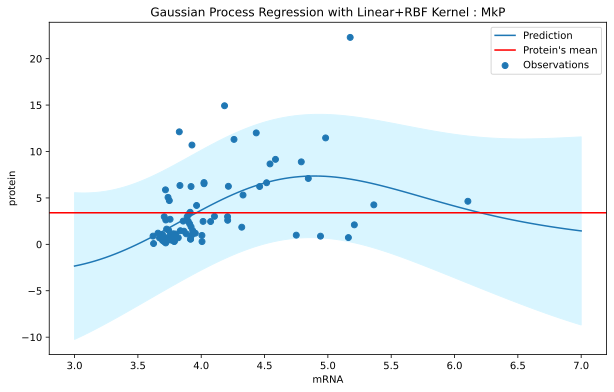

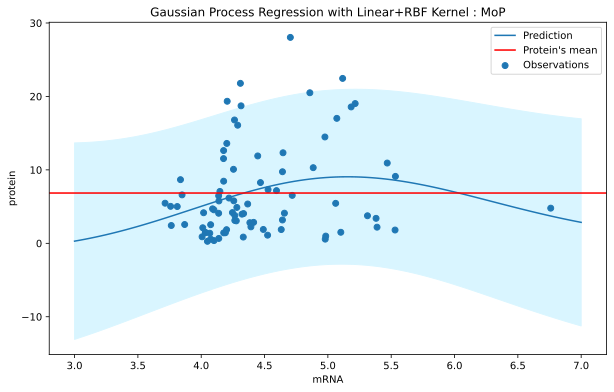

In [ ]:
for idx in range(6):
  x = np.array(avg_mRNA_cell_type[idx])
  X = x.reshape((-1,1))
  y = np.array(avg_protein_cell_type[idx])
  gaussian_process_cell_type(X, y, cell_types[idx])